In [1]:
import numpy as np

import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.risks as risks
import mlgrad.cls as cls

from pprint import pprint

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X, Y = digits.data, digits.target
print(X.shape)
#scaler = MinMaxScaler()
#Xt = scaler.fit_transform(X)
Xt = X / 16.

(1797, 64)


In [3]:
def binarize(Y, n):
    rows = []
    for y in Y:
        row = np.zeros(n, 'd')
        row[y] = 1
        row = 2*row-1
        rows.append(row)
    return np.array(rows)

Ys = binarize(Y, 10)
print(Ys.shape, Xt.shape)
#print([y for y in Ys])

(1797, 10) (1797, 64)


In [16]:
XY = np.concatenate((Xt,Ys), axis=1)
print(XY[0])

[ 0.000  0.000  0.312  0.812  0.562  0.062  0.000  0.000  0.000  0.000
  0.812  0.938  0.625  0.938  0.312  0.000  0.000  0.188  0.938  0.125
  0.000  0.688  0.500  0.000  0.000  0.250  0.750  0.000  0.000  0.500
  0.500  0.000  0.000  0.312  0.500  0.000  0.000  0.562  0.500  0.000
  0.000  0.250  0.688  0.000  0.062  0.750  0.438  0.000  0.000  0.125
  0.875  0.312  0.625  0.750  0.000  0.000  0.000  0.000  0.375  0.812
  0.625  0.000  0.000  0.000  1.000 -1.000 -1.000 -1.000 -1.000 -1.000
 -1.000 -1.000 -1.000 -1.000]


In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(XY)

PCA()

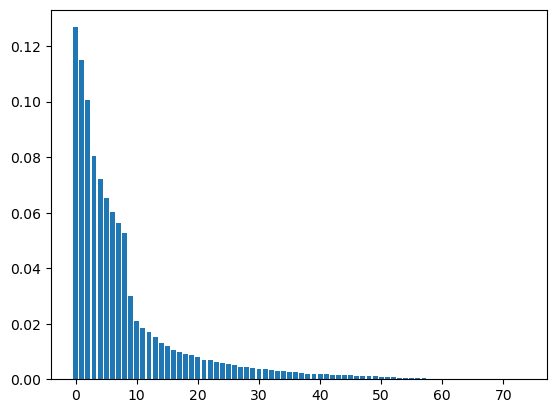

In [18]:
plt.bar(range(XY.shape[1]), pca.explained_variance_ratio_)
plt.show()

In [22]:
np.sum(pca.explained_variance_ratio_[:10])

0.7595166371172304

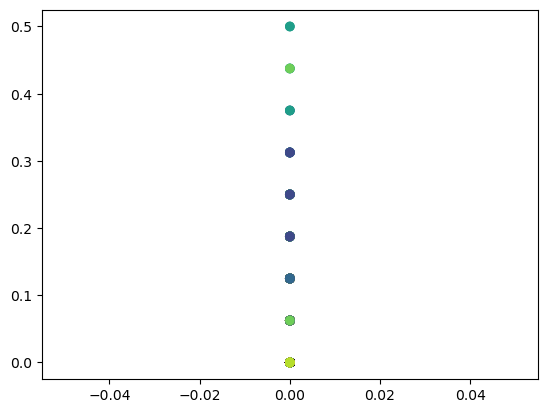

In [15]:
plt.scatter(XY[:,0], XY[:,1], c=Y)
plt.show()

In [4]:
n_input = 64
n_hidden = 15
n_output = 10
layer1 = models.LinearLayer(n_input, n_hidden)
layer2 = models.ScaleLayer(funcs.Sigmoidal(), n_hidden)
layer3 = models.LinearLayer(n_hidden, n_output)

ffnn = models.FFNetworkModel()
ffnn.add(layer1)
ffnn.add(layer2)
ffnn.add(layer3)

ffnn.allocate()

In [5]:
ffnn.param[:] = np.random.random(size=ffnn.n_param)

In [6]:
loss_func = loss.ErrorMultLoss2(funcs.Square())
alg = cls.classification_as_regr(Xt, Ys, ffnn, loss_func)

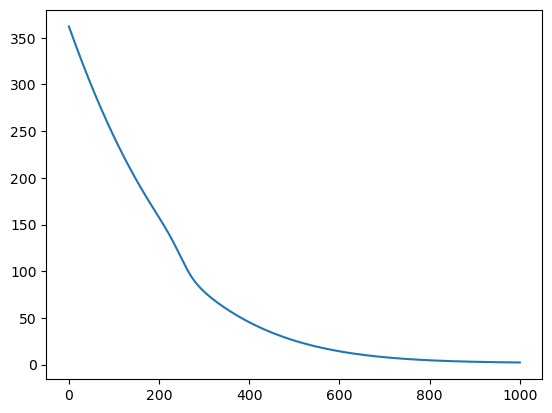

In [7]:
plt.plot(alg.lvals)
plt.show()

In [11]:
for x,y in zip(Xt,Ys):
    # print(ffnn.evaluate(x))

[0.000 0.000 0.312 0.812 0.562 0.062 0.000 0.000 0.000 0.000 0.812 0.938
 0.625 0.938 0.312 0.000 0.000 0.188 0.938 0.125 0.000 0.688 0.500 0.000
 0.000 0.250 0.750 0.000 0.000 0.500 0.500 0.000 0.000 0.312 0.500 0.000
 0.000 0.562 0.500 0.000 0.000 0.250 0.688 0.000 0.062 0.750 0.438 0.000
 0.000 0.125 0.875 0.312 0.625 0.750 0.000 0.000 0.000 0.000 0.375 0.812
 0.625 0.000 0.000 0.000]
[0.000 0.000 0.000 0.750 0.812 0.312 0.000 0.000 0.000 0.000 0.000 0.688
 1.000 0.562 0.000 0.000 0.000 0.000 0.188 0.938 1.000 0.375 0.000 0.000
 0.000 0.438 0.938 1.000 1.000 0.125 0.000 0.000 0.000 0.000 0.062 1.000
 1.000 0.188 0.000 0.000 0.000 0.000 0.062 1.000 1.000 0.375 0.000 0.000
 0.000 0.000 0.062 1.000 1.000 0.375 0.000 0.000 0.000 0.000 0.000 0.688
 1.000 0.625 0.000 0.000]
[0.000 0.000 0.000 0.250 0.938 0.750 0.000 0.000 0.000 0.000 0.188 1.000
 0.938 0.875 0.000 0.000 0.000 0.000 0.500 0.812 0.500 1.000 0.000 0.000
 0.000 0.000 0.062 0.375 0.938 0.688 0.000 0.000 0.000 0.062 0.500 0.812

In [ ]:
#np.sum(np.equal([np.sum(np.sign(ffnn(x)*y)) for x,y in zip(Xt,Ys)], 10))/len(Y)

In [ ]:
#plt.plot(np.sort([np.sum(np.abs(ffnn(x)-y)) for x,y in zip(Xt,Ys)]))
#plt.show()

In [ ]:
ffnn.param[:] = np.random.random(size=ffnn.n_param)

In [ ]:
loss_func = loss.ErrorMultLoss(func.Square())
er2 = erisk2(Xt, Ys, ffnn, loss_func)
fg2 = fg(er2, h=0.002, tol=1.0e-7, )
avg2 = averager_it(func.QuantileFunc(0.95, func.Sqrt(0.001)))
wg2 = weights.WMWeights(avg2, er2)
alg = erm_irgd(fg2, wg2, n_iter=30)
Yp2 = np.array([ffnn(x) for x in Xt])

In [ ]:
plt.plot(alg.lvals)
plt.show()

In [ ]:
np.sum([np.argmax(ffnn(x)) == y for x,y in zip(Xt,Y)])/len(Y)